# 1주차 OpenCV 기초
- OpenCV 기초를 알아보기 전에 먼저 이미지 증강의 의의를 생각해봅니다
- 이미지의 구조를 픽셀부터 행과 열까지 알아봅니다
- OpenCV 의 기본인 이미지 읽고 쓰기, 자르기 붙여넣기, 간단한 효과 주기(이미지 smoothing)을 알아봅니다

# 전직 LPR 개발자가 생각해본 이미지 증강의 이유
### 존재하지 않지만 머지않은 미래에 존재할 이미지
- 신형 번호판
- 기사: "‘8자리 번호판’ 주차장 90% 인식 불가…혼란 우려
- https://news.kbs.co.kr/news/view.do?ncd=4256408\ 

### 존재하지만 비중이 낮은 이미지
- 전기차 번호판
- 기사: ""전기차 번호판 인식 어려워"…전기차주들 불편 호소"
- https://kgnews.co.kr/mobile/article.html?no=665858

# 증강 이미지에 대한 편견
### 증강 이미지는 학습 데이터집합으로만 사용한다?
- 증강 이미지를 Validation 데이터집합으로 사용할 수 있습니다

### 증강 이미지만으로 학습할 수 없다?
- 증강 이미지만으로 학습해서 실제 이미지로 이루어진 Validation 데이터집합으로 성능을 평가할 수 있습니다

### 증강 이미지는 데이터 품질이 실제 데이터만 못하다?
- 당신의 장인정신에 달려있습니다

# 그렇다면 지금 당장 이미지 증강을 해봅시다
#### 그림판을 열고
#### 그림을 잘라서
#### 다른 그림에 붙이세요
#### 그것도 ~발로 그린~ 증강입니다
#### 이미지 증강은 맞는데 그것을 학습 데이터집합으로 사용하지는 않겠지요

# 그래서 OpenCV 를 배워봅시다
### Q: OpenCV 고수임? 
### A: 아뇨
### Q: 겸손한척?
### A: 아뇨, 지금 당장 opencv 검색해봐도 본 강의내용 보다 훨씬 더 깊이 있습니다
### Q: 근데 무슨자격으로 강의를?
### A: 이정도만 알아도 연구에서 유용하게 활용 가능하다는 것을 보여주고 싶어서요

# 그럼 시작해봅시다
### 여러분은 아래 중 어떤 유형인가요?
* [ ] google colab 사용자
* [ ] anaconda만 설치된 사람
* [ ] python만 설치된 사람
* [ ] python도 설치 안된 사람
* [ ] PC도 없는 사람 
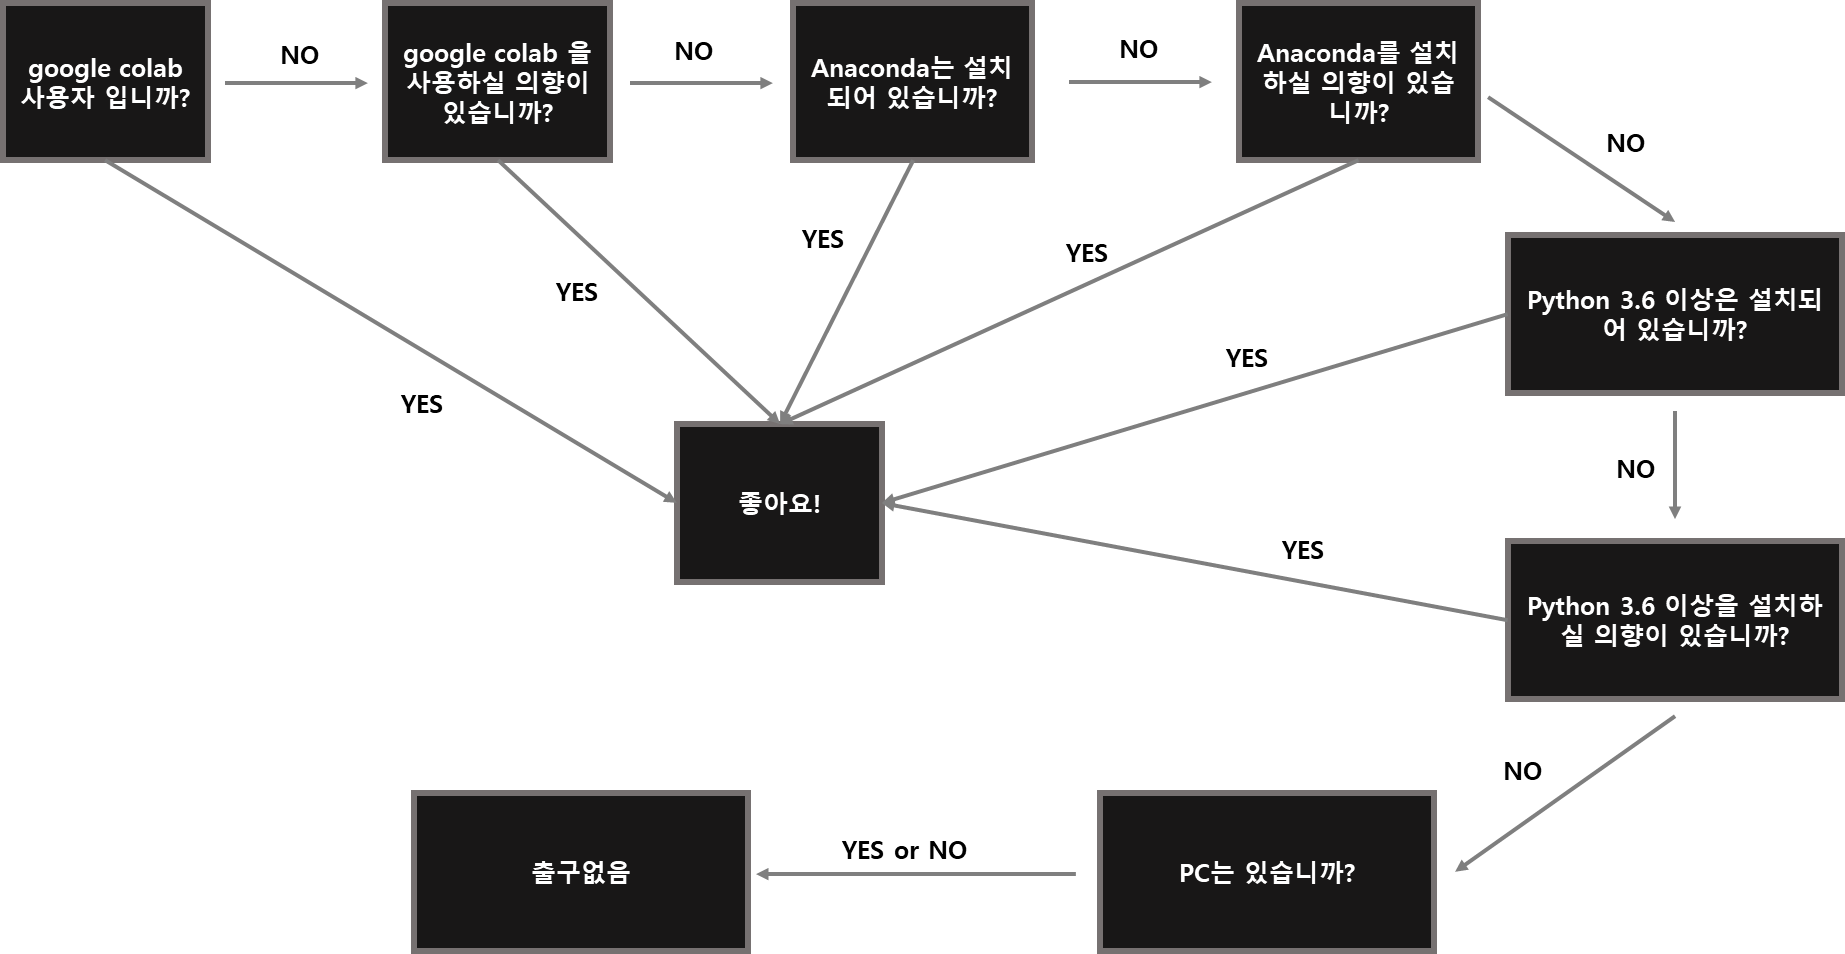

# OpenCV를 설치해봅시다
- colab 사용자는 아래 내용을 읽어보기만 하고 넘어갑니다
- pip 사용자는 https://pypi.org/project/opencv-python/ 에서 설치명령 확인
- Anaconda 사용자는 https://anaconda.org/conda-forge/opencv 에서 설치명령 확인
- python 3.6, 3.7, 3.8, 3.9, 3.10 에서 설치 가능

In [ ]:
# pip 사용자
! pip install opencv-python

# Anaconda 사용자
! conda install -y -c conda-forge opencv

# 압축된 데이터를 풀읍시다

In [ ]:
! unzip image.zip

# 코딩하기 하기전에... 이미지란 무엇인가요?
- 픽셀별 숫자 배열
- jpg? png? bmp? header, payload 포맷이 다 다른데?
- 읽고나면 어짜피 그냥 배열
- 이미지를 읽는다는 것은 이미지 포맷에 맞게 읽어서 픽셀정보 숫자들을 메모리에 올리는 것
- 그러니까 그냥 배열

# 말만하지 말고 증명해봅시다
- OpenCV를 사용하기 위한 첫걸음 import cv2
- cv2를 이용해 이미지를 읽습니다

# OpenCV로 읽었는데 ndarray가 나옵니다
- 역시 이미지는 그냥 배열입니다
- 좀더 정확히 말하면 numpy 배열이네요

In [ ]:
import cv2

img_jpg = cv2.imread('image.jpg')

print(type(img_jpg))

# png로 읽어도 bmp로 읽어도 읽고나면 똑같은 배열!

In [ ]:
import cv2
import numpy as np

img_png = cv2.imread('image.png')
img_bmp = cv2.imread('image.bmp')

np.array_equiv(img_png, img_bmp)

# 아래 꺼는 말이 틀리네요!
- 넵 손실압축
- 똑같이 보이는 이미지라도 데이터로서는 다른 데이터일 수 있네요

In [ ]:
import cv2
import numpy as np

img_png = cv2.imread('image.png')
img_jpg = cv2.imread('image.jpg')

np.array_equiv(img_png, img_jpg)

In [ ]:
print(img_jpg)
print('------- 경 계 선 ---------')
print(img_png)

# 잠깐! 저기 보이는 3차원 배열은 뭐죠?
# 그리고 왜 괄호 하나에 3개씩 묶여있나요?
# 각 숫자의 의미는 뭐죠?
- ndarray 이니까 shape을 확인해봅니다

In [ ]:
import cv2

img_jpg = cv2.imread('image.jpg')

img_jpg.shape

# 실제 이미지를 확인해봅시다
- 가로가 더 길고 -> 375 이 세로(행), 501이 가로(열)
- 컬러 이미지 -> 3채널
- 각 채널별 숫자 -> 해당 색상의 명도를 unsigned 8bit integer로 표현(0 ~ 255)

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


img_jpg = cv2.imread('image.jpg')

print(img_jpg)

if colab_env:
    cv2_imshow(img_jpg)
else:
    cv2.imshow('image', img_jpg)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 모든 색상이 0이면 무슨색일까요?
- 검정색

# 모든 색상이 255 이면 무슨색일까요?
- 흰색

# 정말 맞나요?
- 확인해봅시다

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

img_black = cv2.imread('black.bmp')
print(img_black)

if colab_env:
    cv2_imshow(img_black)
else:
    cv2.imshow('image', img_black)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
      colab_env = False

img_white = cv2.imread('white.bmp')

print(img_white)

if colab_env:
    cv2_imshow(img_white)
else:
    cv2.imshow('image', img_white)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 채널은 뭐죠?
- Blue
- Green
- Red

# 누가 Blue에요? 
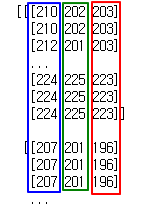

# 직접 확인해봅시다
- 아래 주석을 하나씩 풀면서 테스트 해봅니다

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


img_test = cv2.imread('blue.png')
# img_test = cv2.imread('green.png')
# img_test = cv2.imread('red.png')

print(img_test)

if colab_env:
    cv2_imshow(img_test)
else:
    cv2.imshow('image', img_test)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 그래서 이런것을 BGR 채널이라고 합니다
- OpenCV는 기본적으로 BGR 채널로 배열을 만듭니다
- 그럼 RGB 는 뭘까요?
- cv2.cvtColor 를 써서 아래 주석을 다시 하나씩 풀어봅시다

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


img_test = cv2.imread('blue.png')
# img_test = cv2.imread('green.png')
# img_test = cv2.imread('red.png')

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img_test)

if colab_env:
    cv2_imshow(img_test)
else:  
    cv2.imshow('image', img_test)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 만약 RGB로 저장된 것을 BGR로 읽으면?
- 이미지를 RGB로 변환해서 저장
- RGB로 변환된 이미지를 읽기

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


img_test = cv2.imread('blue.png')

# RGB로 변환하고 저장하기
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
cv2.imwrite('blue2.png', img_test)

print(img_test)

# RGB로 된 변환된 이미지 읽기
img_test = cv2.imread('blue2.png')

if colab_env:
    cv2_imshow(img_test)
else:
    cv2.imshow('image', img_test)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

- RGB로 변환된 이미지를 읽고 RGB로 변환하기

In [ ]:
img_test = cv2.cvtColor(img_test, cv2.COLOR_RGB2BGR)

if colab_env:
    cv2_imshow(img_test)
else:
    cv2.imshow('image', img_test)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
print(img_test)

# BGR로 읽는 OpenCV, RGB로 읽는 matplotlib
- 일단 주석을 안풀고 해보면 Blue 이미지가 Red로 출력
- 주석을 풀면서 테스트 해봅시다
- COLOR_BGR2RGB 와 COLOR_RGB2BGR 의 결과가 똑같음
- B와 R의 위치를 바꾸는 것이니 Blue성분만 있는 이미지나 Red성분만 있는 이미지인 경우 결과가 동일

In [ ]:
import cv2
import matplotlib.pyplot as plt

# OpenCV로 읽고
img_test = cv2.imread('blue.png')
# img_test = cv2.imread('red.png')

# img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
# img_test = cv2.cvtColor(img_test, cv2.COLOR_RGB2BGR)

# pyplot으로 출력하기
plt.imshow(img_test)
plt.show()

# GREEN 순서는 바꾸지 않는다
- 주석을 풀지말고 그대로 테스트 해봅시다
- 그리고 주석을 풀면서 테스트 해봅시다
- 주석을 풀으나 안풀으나 똑같은 결과, COLOR_BGR2RGB 를 쓰나 COLOR_RGB2BGR 를 쓰나 아무것도 안쓰나 똑같은 결과
- BGR, RGB에서 G의 순서는 변함없기 때문

In [ ]:
import cv2
import matplotlib.pyplot as plt

# OpenCV로 읽고
img_test = cv2.imread('green.png')

# img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
# img_test = cv2.cvtColor(img_test, cv2.COLOR_RGB2BGR)

# pyplot으로 출력하기
plt.imshow(img_test)
plt.show()

# GRAY scale
- 일명 흑백 이미지입니다
- 3채널이 아니라 1채널입니다
- 원래 흑백인 이미지를 1채널로 읽어봅니다
- 원래 3채널인 이미지를 1채널로 읽어봅니다

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


img_test = cv2.imread('gray.png', cv2.IMREAD_GRAYSCALE)
print(img_test)

print('--------------- 경계선 -----------------')

img_test = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
print(img_test)

if colab_env:
    cv2_imshow(img_test)
else:
    cv2.imshow('image', img_test)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# GRAY scale을 BGR scale로!
- 불가능 하겠죠?
- 그런데 코드가 먹힙니다 뭐죠?
- 배열에 찍힌 숫자를 봅시다

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


img_test = cv2.imread('gray.png', cv2.IMREAD_COLOR)
print(img_test)

if colab_env:
    cv2_imshow(img_test)
else:
    cv2.imshow('image', img_test)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 수동으로 BGR2GRAY를 해봅시다!
- 장인정신?

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


img_test = cv2.imread('image.png', cv2.IMREAD_COLOR)
hight, width, channel = img_test.shape

# 가장 안쪽에 있는 차원(axis=2) 즉 픽셀별로 평균을 내고, 이를 2차원으로(가로, 세로만 있고 채널은 없는) 변경하고 unsigned 8bit intager로 변환
img_test = np.mean(img_test, axis=2).reshape(hight, width).astype('uint8')

# cv2를 쓰는 방법도 있습니다
# img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)

if colab_env:
    cv2_imshow(img_test)
else:
    cv2.imshow('image', img_test)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 괄호 안에 숫자는 알았고, 그럼 밖에 있는 괄호 2개는 뭐죠?
- 배열이 너무 길어서 못알아보겠으니 좀 작은 이미지로 확인해봅시다
- 3x3 크기의 세로로 Blue, Green, Red 순서로 3줄 있는 그림입니다
- BGR 로 읽혔으니 [255 0 0] 이 Blue, [0 128 0] 이 Green [0 0 255] 는 Red
- R G B R G B R G B 순서로 출력되네요

In [ ]:
import cv2

img_blue = cv2.imread('blue_rgb.png')

print(img_blue)

# 위에 배열을 맨위(1) 에서부터 맨아래로(9) 읽어보면 순서는 이 그림과 같습니다
- 채널 3개 숫자괄호가 처음
- 채널 괄호를 빠져나오면 가로 픽셀에 대한 괄호가 먼저 나오고
- 가로 픽셀 한줄을 다 표현하면 다음 가로 줄에 대한 괄호가 나옵니다
- 마지막 가로 줄까지 다 읽으면 마지막 괄호가 닫힙니다
- 이렇게 3차원 배열인 것입니다
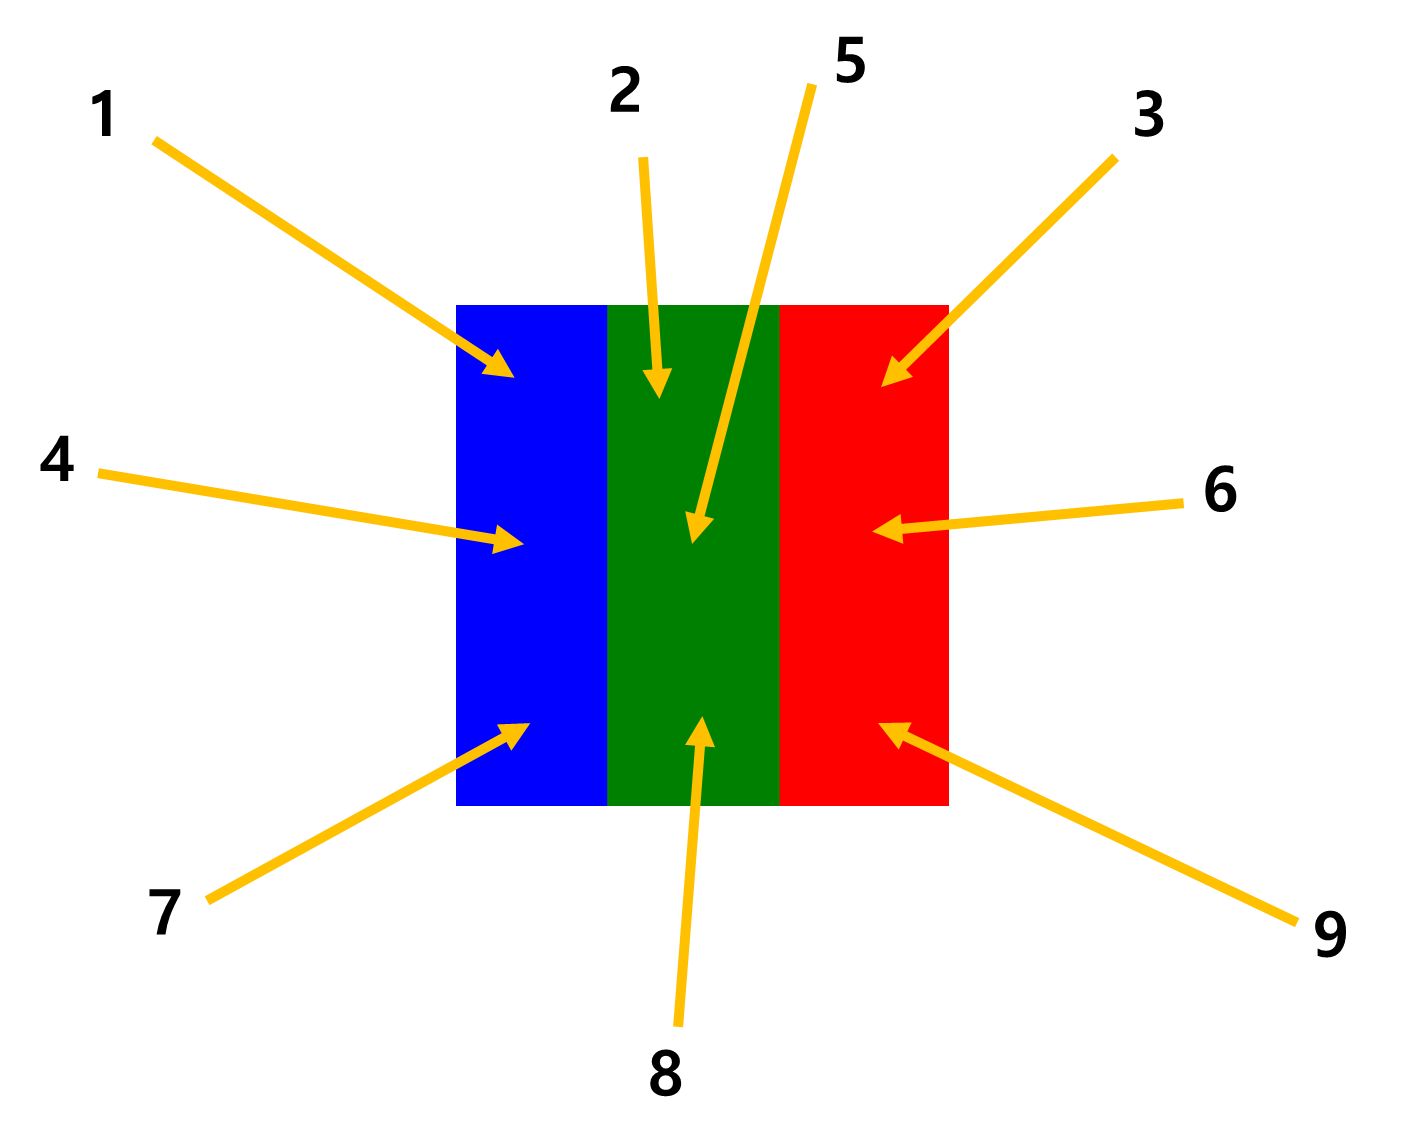

# 위에서 아래로 내려오는거 맞나요?
- 픽셀별로 색깔 바꿔서 테스트 해봅시다
- 좌->우, 상->하 순서로 각 픽셀 R G B G B R R B G 로 이루어진 3x3 이미지 

In [ ]:
import cv2

img_blue = cv2.imread('blue_rgbgrbrbg.png')

print(img_blue)

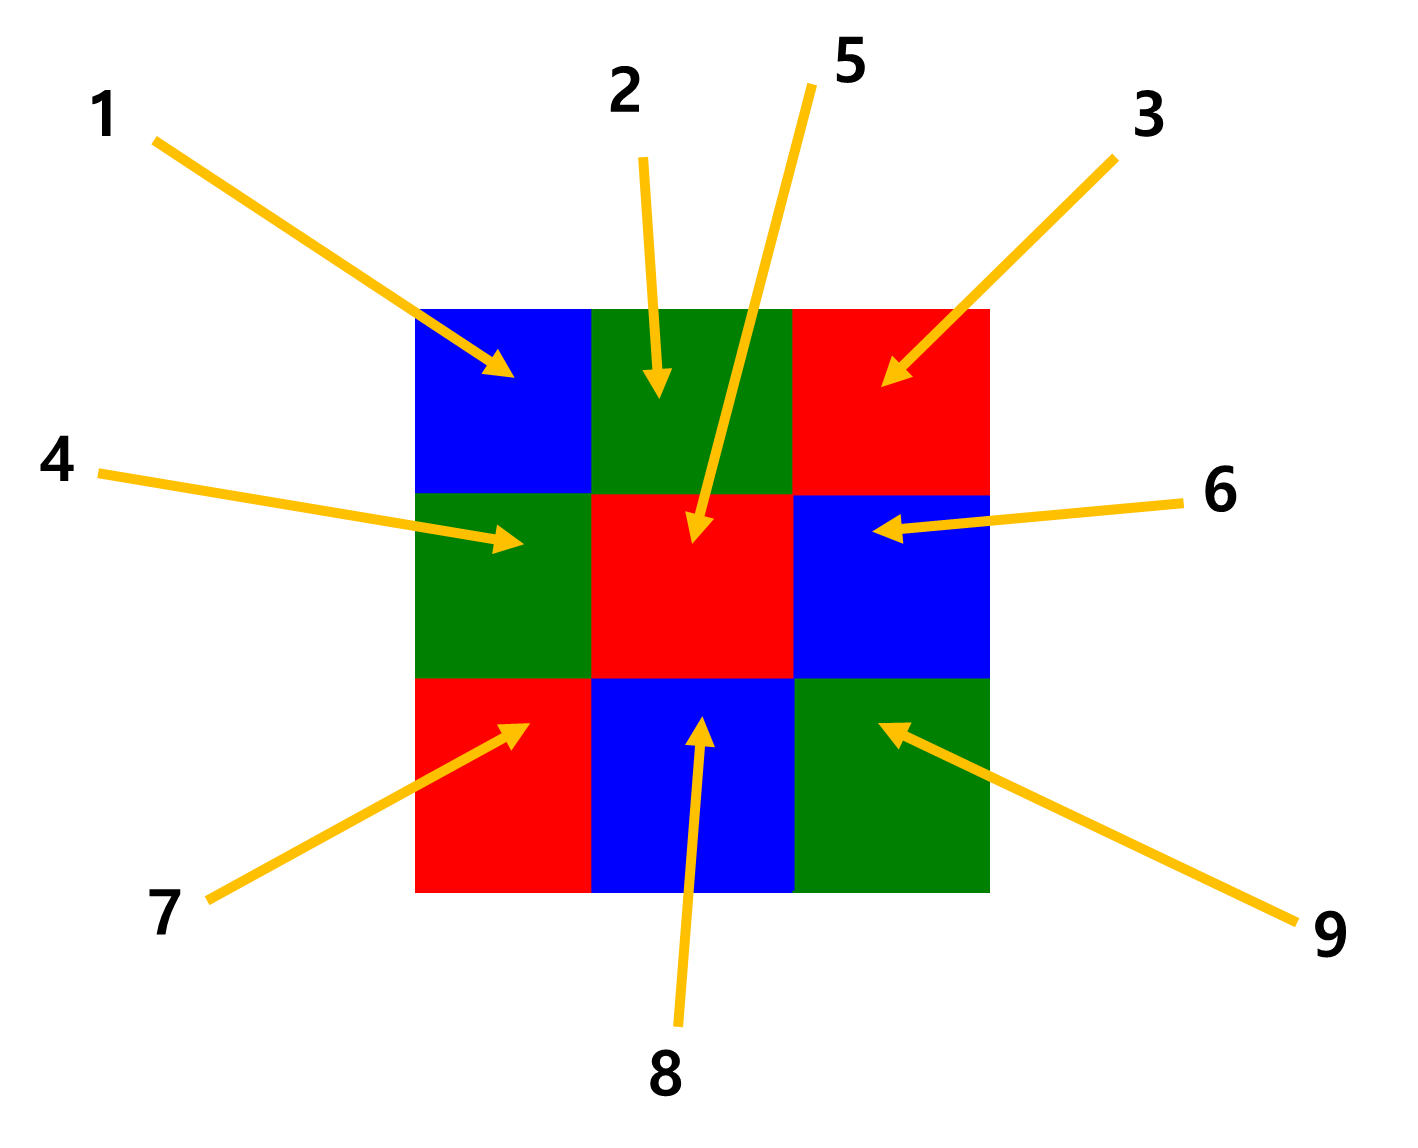

# 이제 이미지의 요소는 다 알았으니 본격적으로 OpenCV를 알아봅시다
- 서론이 너무 길었습니다. 이제 진짜 OpenCV 라이브러리 쓸거에요

# 읽기
- 아까 했지만 다시 한번 확인하면서 아까 설명하지 않고 넘어간 구문에 대해 알아봅니다

In [ ]:
import cv2

colab_env = True

try:
    # 이 import가 성공하면 colab 환경으로 간주
    from google.colab.patches import cv2_imshow
except:
    # 위 import가 실패하면 jupyter notebook 환경으로 간주
    colab_env = False


# imread에 들어가는 파라미터는 (당연히) 이미지의 경로 
img_jpg = cv2.imread('image.jpg')


if colab_env:
    # colab 환경에서는 웹브라우저에서 돌아가는 colab이 사용자 PC에서 이미지 창을 별도로 띄울 수 없으니 별도의 colab 전용 라이브러리를 사용
    cv2_imshow(img_jpg)
else:
    # 이미지를 PC 화면으로 확인
    # 첫번쩨 파라미터는 창의 이름, 두번째 파라미터가 이미지 배열 => 항상 햇갈림
    cv2.imshow('image', img_jpg)
    # 키가 눌릴때 까지 다음 코드를 실행하지 않고 대기, 단 파라미터에 쓰인 시간(밀리초) 가 지나면 다음 코드로 넘어감, 창이 닫히면 다음 코드를 실행
    cv2.waitKey(0)
    # 창 닫기, 이걸 안하면 무슨 일이 발생할까요? => 코드는 종료되고 이미지창은 불쌍하게 혼자 남네요
    cv2.destroyAllWindows()

# 한글 파일명으로 바꿔볼까요?
- 아마 윈도우 상에서의 jupyter notebook 환경이라면 cv2.imread로 읽지 못할 것입니다

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


# imread에 들어가는 파라미터는 (당연히) 이미지의 경로 
img_jpg = cv2.imread('한글파일명.jpg')

if colab_env:
    # colab 환경에서는 웹브라우저에서 돌아가는 colab이 사용자 PC에서 이미지 창을 별도로 띄울 수 없으니 별도의 colab 전용 라이브러리를 사용
    cv2_imshow(img_test)
else:
    # 이미지를 PC 화면으로 확인
    # 첫번쩨 파라미터는 창의 이름, 두번째 파라미터가 이미지 배열 => 항상 햇갈림
    cv2.imshow('image', img_test)
    # 키가 눌릴때 까지 다음 코드를 실행하지 않고 대기, 단 파라미터에 쓰인 시간(밀리초) 가 지나면 다음 코드로 넘어감, 창이 닫히면 다음 코드를 실행
    cv2.waitKey(0)
    # 창 닫기, 이걸 안하면 무슨 일이 발생할까요? => 코드는 종료되고 이미지창은 불쌍하게 혼자 남네요
    cv2.destroyAllWindows()

# 그치만 나는 한글파일명을 쓰고싶어요!
- OpenCV로 읽은 이미지는 어짜피 ndarrray라고 했습니다
- numpy로 읽어봅시다
- colab에서 한글파일 읽기 성공하신 분도 한번 해봅시다

In [ ]:
import numpy as np
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


# 일단 python 기본 open 함수로 이미지를 읽고 (텍스트가 아닌 바이너리 이기 때문에 rb 모드로 읽습니다)
stream = open('한글파일명.jpg', 'rb')

# byte array로 쭉 읽고
bytes = bytearray(stream.read())

# 0 ~ 255 이기 때문에 반드시 unsighed 8bit integer로 형변환 
numpyarray = np.asarray(bytes, dtype=np.uint8)

if colab_env:
    # imdecode? 이걸 안하면 어떻게 될까요?
    cv2_imshow(cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED))
    # cv2_imshow(numpyarray)
else:
    # imdecode? 이걸 안하면 어떻게 될까요?
    cv2.imshow('from_ndarray', cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED))
    # cv2.imshow('뭐야 무서워', numpyarray)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

print(numpyarray.shape)
print(numpyarray)
print(cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED).shape)

# 쓰기
- OpenCV로 읽은 이미지는 어짜피 ndarrray라고 했습니다
- 그럼 OpenCV로 읽지 말고 ndarray 직접 만들어서 이미지로 만들어봅시다

In [ ]:
import cv2
import numpy as np

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


# 100, 100, 3 shape 으로 0 ~ 255의 난수 생성
img_test = np.random.randint(255, size=(100,100,3))

# 0 ~ 255 이기 때문에 반드시 unsighed 8bit integer로 형변환 
img_test = img_test.astype('uint8')

# 저장하기 전에 numpy로 만든 배열을 바로 화면으로 출력해봅니다
if colab_env:
    cv2_imshow(img_test)
else:
    cv2.imshow('from_ndarray', img_test)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# from_ndarray.png 라는 이미지로 저장
cv2.imwrite('from_ndarray.png', img_test)

# 이미지 자르고 붙이기

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


# imread에 들어가는 파라미터는 (당연히) 이미지의 경로 
img_jpg = cv2.imread('image.jpg')

height, width, channel = img_jpg.shape

# 166행까지 자르기 = 위에서 절반까지 자르기
img_cut = img_jpg[0:int(height/2),0:width]

if colab_env:
    cv2_imshow(img_cut)
else:
    cv2.imshow('image_cut', img_cut)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 이미지를 4구역으로 잘라서 출력하기
- 좌상단
- 우상단
- 우하단
- 좌하단

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False


# imread에 들어가는 파라미터는 (당연히) 이미지의 경로 
img_jpg = cv2.imread('image.jpg')

height, width, channel = img_jpg.shape

# 좌상단
img_cut = img_jpg[:int(height/2),:int(width/2)]
if colab_env:
    cv2_imshow(img_cut)
else:
    cv2.imshow('image_cut', img_cut)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
print()

# 우상단
img_cut = img_jpg[:int(height/2),int(width/2):]
if colab_env:
    cv2_imshow(img_cut)
else:
    cv2.imshow('image_cut', img_cut)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
print()

# 우하단
img_cut = img_jpg[int(height/2):,int(width/2):]
if colab_env:
    cv2_imshow(img_cut)
else:
    cv2.imshow('image_cut', img_cut)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
print()

# 좌하단
img_cut = img_jpg[int(height/2):,:int(width/2)]
if colab_env:
    cv2_imshow(img_cut)
else:
    cv2.imshow('image_cut', img_cut)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 이번에는 자른 이미지를 다른 이미지에 붙여봅시다
- 비행기 이미지 지겹죠?
- 다른 비행기 갑니다^^

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

airchina = cv2.imread('images/2008_003976.jpg')
klm = cv2.imread('images/2008_003261.jpg')

if colab_env:
    cv2_imshow(airchina)
else:
    cv2.imshow('Air China', airchina)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if colab_env:
    cv2_imshow(klm)
else:
    cv2.imshow('KLM', klm)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# 이 숫자들... 어디서 나온걸까요?
klm_tail = klm[54: 150, 333:462]

if colab_env:
    cv2_imshow(klm_tail)
else:
    cv2.imshow('KLM tail', klm_tail)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

airchina_with_klm_tail = airchina.copy()

# 이 숫자는... 어디서 나온걸까요?
airchina_with_klm_tail[62: 158, 360: 489] = klm_tail

if colab_env:
    cv2_imshow(airchina_with_klm_tail)
else:
    cv2.imshow('Ait China with KLM tail', airchina_with_klm_tail)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 이미지 smoothing
- 발로 합성한거 부끄러우니까 좀 뭉개봅시다
- blur에서 kernel이란?: 뭉개는 단위 정의
- https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html 를 참조합시다
- 3x3 kernel은 3x3 영역 단위로 해당 영역의 평균값으로 치환
- $\frac{1}{9}\begin{bmatrix}1&1&1\\1&1&1\\1&1&1\\ \end{bmatrix}$

In [ ]:
# 위의 셀에 이어서 실행합니다

blur = cv2.blur(airchina_with_klm_tail,(10,10))

if colab_env:
    cv2_imshow(blur)
else:
    cv2.imshow('Blured Ait China with KLM tail', blur)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 못믿겠으니까 숫자로 확인해봅시다
- 숫자좀 단순하게 하기 위해 GRAYSCALE로 읽고 해봅니다 
- 확대해보면 이렇게 생긴 9x9 이미지 입니다

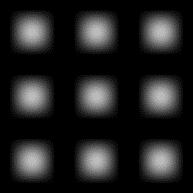

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

img_3x3 = cv2.imread('white_dot_9x9.bmp', cv2.IMREAD_GRAYSCALE)
print(img_3x3)

blur = cv.blur(img_3x3,(3,3))

print('----------------- 경 계 선 -----------------')
print(blur)

if colab_env:
    cv2_imshow(blur)
else:
    cv2.imshow('Blured white_dot_9x9 image', blur)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 가운데는 255의 9분의 1로 된거 맞는데...
- 테두리는 왜그런거죠?
- border_type
- https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37 을 참조합니다

In [ ]:
import cv2

img_3x3 = cv2.imread('white_dot_9x9.bmp', cv2.IMREAD_GRAYSCALE)
print(img_3x3)

blur = cv2.blur(img_3x3,(3,3), borderType=cv2.BORDER_ISOLATED )

print('----------------- 경 계 선 -----------------')
print(blur)

# 이제 완벽한 9분의 1이 되었네요
- 편안...^_^

# 오늘의 과제
- 아래 이미지는 열차 2대가 분리된 모습입니다
- 좌측열차와 우측열차를 합쳐봅시다 
![image.png](attachment:image.png)

In [ ]:
import cv2

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

img_train = cv2.imread('images/2007_000042.jpg')

# 여기를 채워봅시다
if colab_env:
    cv2_imshow(img_train)
else:
    cv2.imshow('train', img_train)
    cv2.waitKey(0)
    cv2.destroyAllWindows()